<img align="right" src="../../additional_data/banner_siegel.png" style="width:1000px;">

#  Spatial Vector Data in Python : Geopandas

* [**Sign up to the JupyterHub**](https://www.phenocube.org/) to run this notebook interactively from your browser
* **Compatibility:** Notebook currently compatible with the Open Data Cube environments of the University of Wuerzburg
* **Prerequisites**: we assume that readers have a basic understanding of spatial vector data

## Background

The two basic data types we encounter when processing remote sensing data are **spatial raster data** and **spatial vector data**. In addition to the previous tutorials we presented concerning datacube and raster data processing, in this notebook however, we would like to introduce spatial vector data processing in Python to our readers.

Assuming that our readers already have an understanding of spatial vector data, we won't start with illustrating terms and concepts, but focus on presenting how to process it using Python.

Let's start!:)

## Description

This notebook contains the following sections:

* **Overview of Data Structure** 
<br>

* **Manipulating GeoDataFrames**
<br>

* **Basic Processing on Spatial Vector Data**
    * Reproject Spatial Vector Data
    * Calculate perimeters of polygons
    * Add the calculated parameters to GeoDataFrame

## Overview of Data Structure

**`pandas`** is the standard package in Python to work on a ***DataFrame***. Each column of the DataFrame is a ***pandas series***, which is substantially a one-dimensional array.

**`geopandas`** is the package we are introducing for processing spatial vector data. It reads any spatial vector data as a ***GeoDataFrame*** that is just like a standard pandas DataFrame, but with an additional column called *`['geometry']`*.

The column *`['geometry']`* is, instead of a pandas series, a ***Geoseries***, which is substantially also a one-dimensional array. Each entry in this series is a set of coordinates depicting the shape(s) of one or multiple geometric objects.

There are three basic classes of geometric objects:
* Point / Multipoints
* Line / Multilines
* Polygon / Multipolygons

In summary, the structure of a `GeoDataFrame` generally looks like as follows:

***
* Column_A *(`pandas series`)*
* Column_B *(`pandas series`)*
* ...
* Column "geometry" *(`geoseries`)*
    * (e.g.) Multipolygon_1 *(`shapely.geometry`)*
        * polygon_1a
        * polygon_1b
    * (e.g.) Multipolygon_2 *(`shapely.geometry`)*
        * polygon_2a
        * polygon_2b
***

* *Note: **`shapely`** is the package that `geopandas` relys on to handle geometric objects, so the data types are displayed as `shapely.geometry.polygon/multipolygon/etc.`.*
* *Note: all entries in a GeoSeries need not be of the same geometric type, although certain export operations will fail if this is not the case.*

## Manipulating GeoDataFrames
<br>

***Please keep in mind that the approaches of manipulating a `GeoDataFrame` usually also work for a standard `pandas dataframe`.***

### Read Spatial Vector Data

To read local spatial vector data into Python, you just need to define the path to your data and use function **`geopandas.read_file()`**.

**`geopandas`** supports various formats of geospatial vector data including ArcGIS Shapefile(`.shp`), Geopackage(`.gpkg`), Geojson(`.geojson`) etc.
The sample data used in this notebook is a `.gpkg` file of some river basins in South Africa. <br>

***You may download the sample data [here]() or use you own vector data.***

* *In case you have confusions concerning file path, you may refer to one of our previous [tutorials](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_python/01_manage_files_directories_and_paths.ipynb).*
<br>
* *There are also methods of reading vector data through URLs; if you are interested in this, you may refer to [here](https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/spatial-data-using-apis/) and [here](https://gis.stackexchange.com/questions/225586/reading-raw-data-into-geopandas).*

In [1]:
# Packages we need
import os
import geopandas as gpd
from shapely.geometry import Polygon, Point, MultiPolygon

In [2]:
basin = gpd.read_file("https://raw.githubusercontent.com/eo2cube/eo2cube_notebooks/main/get_started/sample_data/basin_saf.geojson")
type(basin)

geopandas.geodataframe.GeoDataFrame

***Tip: `gpd.read_file()` can read `.geojson` file or zipped `.shp` file directly from Github; but note that you need to pass the link to the raw version of the file.***

<AxesSubplot:>

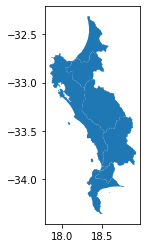

In [3]:
basin.plot()

### Check out Attributes of GeoDataFrame

* ***The first / last 5 records*** --- ***`<gdf>.head()` & `<gdf>.tail()`***

In [4]:
# Check the first 5 records
basin.head()

# Check the last 5 records
#basin.tail()

,fid,HYBAS_ID,NEXT_DOWN,NEXT_SINK,MAIN_BAS,DIST_SINK,DIST_MAIN,SUB_AREA,UP_AREA,PFAF_ID,ENDO,COAST,ORDER,SORT,geometry
0,1,1080015240,0,1080015240,1080015240,0.0,0.0,638.2,638.2,12601077,0,1,0,6770,"MULTIPOLYGON (((18.58611 -34.14167, 18.57999 -..."
1,2,1080015260,0,1080015260,1080015260,0.0,0.0,259.3,259.5,12601078,0,0,1,6771,"MULTIPOLYGON (((18.47500 -33.91667, 18.47500 -..."
2,3,1080015270,0,1080015270,1080015270,0.0,0.0,23.6,23.7,12601079,0,1,0,6772,"MULTIPOLYGON (((18.50000 -33.91250, 18.49779 -..."
3,4,1080015280,0,1080015280,1080015280,0.0,0.0,1488.2,1488.3,12601080,0,0,1,6773,"MULTIPOLYGON (((18.89167 -33.85000, 18.87696 -..."
4,5,1080015290,0,1080015290,1080015290,0.0,0.0,2120.1,2120.1,12601090,0,1,0,6774,"MULTIPOLYGON (((18.37361 -33.82500, 18.36762 -..."


* ***Check Info*** --- ***`<gdf>.info()`***

In [5]:
basin.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   fid        8 non-null      int64   
 1   HYBAS_ID   8 non-null      int64   
 2   NEXT_DOWN  8 non-null      int64   
 3   NEXT_SINK  8 non-null      int64   
 4   MAIN_BAS   8 non-null      int64   
 5   DIST_SINK  8 non-null      float64 
 6   DIST_MAIN  8 non-null      float64 
 7   SUB_AREA   8 non-null      float64 
 8   UP_AREA    8 non-null      float64 
 9   PFAF_ID    8 non-null      int64   
 10  ENDO       8 non-null      int64   
 11  COAST      8 non-null      int64   
 12  ORDER      8 non-null      int64   
 13  SORT       8 non-null      int64   
 14  geometry   8 non-null      geometry
dtypes: float64(4), geometry(1), int64(10)
memory usage: 1.1 KB


* ***Column Names*** --- ***`<gdf>.columns`***

In [6]:
basin.columns

Index(['fid', 'HYBAS_ID', 'NEXT_DOWN', 'NEXT_SINK', 'MAIN_BAS', 'DIST_SINK',
       'DIST_MAIN', 'SUB_AREA', 'UP_AREA', 'PFAF_ID', 'ENDO', 'COAST', 'ORDER',
       'SORT', 'geometry'],
      dtype='object')

* ***Check Shape*** --- ***`<gdf>.shape`*** <br>
The output is the (number of rows, number of columns) of the GeoDataFrame

In [7]:
basin.shape

(8, 15)

### Get Summary Statistics of GeoDataFrame

* ***`<gdf>.describe()`***
* ***`<gdf>.median()`***
* ***`<gdf>.sum()`***
* ...

In [8]:
basin.describe()

,fid,HYBAS_ID,NEXT_DOWN,NEXT_SINK,MAIN_BAS,DIST_SINK,DIST_MAIN,SUB_AREA,UP_AREA,PFAF_ID,ENDO,COAST,ORDER,SORT
count,8.00000,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000,8.000000,8.000000,8.000000,8.000000e+00,8.0,8.000000,8.000000,8.000000
mean,4.50000,1.080220e+09,1.350019e+08,1.080015e+09,1.080015e+09,4.637500,4.637500,986.087500,1851.312500,1.260155e+07,0.0,0.500000,0.625000,6774.500000
std,2.44949,5.798437e+05,3.818431e+08,6.654751e+01,6.654751e+01,13.116831,13.116831,733.854805,2511.916547,7.185255e+02,0.0,0.534522,0.744024,4.440077
min,1.00000,1.080015e+09,0.000000e+00,1.080015e+09,1.080015e+09,0.000000,0.000000,23.600000,23.700000,1.260108e+07,0.0,0.000000,0.000000,6770.000000
25%,2.75000,1.080015e+09,0.000000e+00,1.080015e+09,1.080015e+09,0.000000,0.000000,543.475000,543.525000,1.260108e+07,0.0,0.000000,0.000000,6771.750000
50%,4.50000,1.080015e+09,0.000000e+00,1.080015e+09,1.080015e+09,0.000000,0.000000,805.550000,1111.450000,1.260108e+07,0.0,0.500000,0.500000,6773.500000
75%,6.25000,1.080015e+09,0.000000e+00,1.080015e+09,1.080015e+09,0.000000,0.000000,1553.200000,1841.250000,1.260200e+07,0.0,1.000000,1.000000,6775.500000
max,8.00000,1.081655e+09,1.080015e+09,1.080015e+09,1.080015e+09,37.100000,37.100000,2120.100000,7797.800000,1.260300e+07,0.0,1.000000,2.000000,6784.000000


* ***You may also get statistics on a specific column.*** 
* ***Using `[]`, the output will be a `pandas series`; using `[[]]`, the output will be a `pandas dataframe`.***

In [9]:
basin['SUB_AREA'].describe()

count       8.000000
mean      986.087500
std       733.854805
min        23.600000
25%       543.475000
50%       805.550000
75%      1553.200000
max      2120.100000
Name: SUB_AREA, dtype: float64

In [10]:
basin[['SUB_AREA']].describe()

,SUB_AREA
count,8.000000
mean,986.087500
std,733.854805
min,23.600000
25%,543.475000
50%,805.550000
75%,1553.200000
max,2120.100000


### Sort GeoDataFrame

***--- `<gdf>.sort_values(by = '<col_name>', ascending = <bool>)`***

In [11]:
basin.sort_values(by="HYBAS_ID", ascending=False)

,fid,HYBAS_ID,NEXT_DOWN,NEXT_SINK,MAIN_BAS,DIST_SINK,DIST_MAIN,SUB_AREA,UP_AREA,PFAF_ID,ENDO,COAST,ORDER,SORT,geometry
6,7,1081655350,1080015390,1080015390,1080015390,37.1,37.1,1748.2,1748.3,12602002,0,0,2,6777,"MULTIPOLYGON (((18.65833 -33.43750, 18.65777 -..."
7,8,1080015400,0,1080015400,1080015400,0.0,0.0,734.6,734.6,12603001,0,1,0,6784,"MULTIPOLYGON (((18.22500 -32.69583, 18.22597 -..."
5,6,1080015390,0,1080015390,1080015390,0.0,0.0,876.5,7797.8,12602001,0,0,1,6775,"MULTIPOLYGON (((18.25833 -33.04583, 18.24341 -..."
4,5,1080015290,0,1080015290,1080015290,0.0,0.0,2120.1,2120.1,12601090,0,1,0,6774,"MULTIPOLYGON (((18.37361 -33.82500, 18.36762 -..."
3,4,1080015280,0,1080015280,1080015280,0.0,0.0,1488.2,1488.3,12601080,0,0,1,6773,"MULTIPOLYGON (((18.89167 -33.85000, 18.87696 -..."
2,3,1080015270,0,1080015270,1080015270,0.0,0.0,23.6,23.7,12601079,0,1,0,6772,"MULTIPOLYGON (((18.50000 -33.91250, 18.49779 -..."
1,2,1080015260,0,1080015260,1080015260,0.0,0.0,259.3,259.5,12601078,0,0,1,6771,"MULTIPOLYGON (((18.47500 -33.91667, 18.47500 -..."
0,1,1080015240,0,1080015240,1080015240,0.0,0.0,638.2,638.2,12601077,0,1,0,6770,"MULTIPOLYGON (((18.58611 -34.14167, 18.57999 -..."


### Run Calculations on Columns

In [12]:
# Convert "upstream area" from km2 to m2
basin["UP_AREA"] *= 10e6
basin[["UP_AREA"]]

,UP_AREA
0,6.382000e+09
1,2.595000e+09
2,2.370000e+08
3,1.488300e+10
4,2.120100e+10
5,7.797800e+10
6,1.748300e+10
7,7.346000e+09


### Group Values
***---`<gdf>.groupby(["<col_name>"])[["<col_name>"]]`***

In [13]:
# Group "river basin area" by "river order"
basin.groupby(["ORDER"])[["SUB_AREA"]].describe()

SUB_AREA                                                              \
         count         mean         std     min      25%     50%       75%   
ORDER                                                                        
0          4.0   879.125000  885.225829    23.6   484.55   686.4  1080.975   
1          3.0   874.666667  614.452051   259.3   567.90   876.5  1182.350   
2          1.0  1748.200000         NaN  1748.2  1748.20  1748.2  1748.200   

               
          max  
ORDER          
0      2120.1  
1      1488.2  
2      1748.2

In [14]:
# Calc the median of grouped basin area by river order
basin.groupby(["ORDER"])[["SUB_AREA"]].median()

,SUB_AREA
ORDER,
0,686.4
1,876.5
2,1748.2


### Index / Subset GeoDataFrame
* ***Location index: `<gdf>.iloc`***
* ***Label index: `<gdf>.loc`***

In [15]:
basin.iloc[0:3, :]

,fid,HYBAS_ID,NEXT_DOWN,NEXT_SINK,MAIN_BAS,DIST_SINK,DIST_MAIN,SUB_AREA,UP_AREA,PFAF_ID,ENDO,COAST,ORDER,SORT,geometry
0,1,1080015240,0,1080015240,1080015240,0.0,0.0,638.2,6.382000e+09,12601077,0,1,0,6770,"MULTIPOLYGON (((18.58611 -34.14167, 18.57999 -..."
1,2,1080015260,0,1080015260,1080015260,0.0,0.0,259.3,2.595000e+09,12601078,0,0,1,6771,"MULTIPOLYGON (((18.47500 -33.91667, 18.47500 -..."
2,3,1080015270,0,1080015270,1080015270,0.0,0.0,23.6,2.370000e+08,12601079,0,1,0,6772,"MULTIPOLYGON (((18.50000 -33.91250, 18.49779 -..."


In [16]:
# Set "HYBAS_ID" as index
basin_id_index = basin.set_index("HYBAS_ID")

basin_id_index.loc[[1080015240, 1080015260, 1080015270]]

,fid,NEXT_DOWN,NEXT_SINK,MAIN_BAS,DIST_SINK,DIST_MAIN,SUB_AREA,UP_AREA,PFAF_ID,ENDO,COAST,ORDER,SORT,geometry
HYBAS_ID,,,,,,,,,,,,,,
1080015240,1,0,1080015240,1080015240,0.0,0.0,638.2,6.382000e+09,12601077,0,1,0,6770,"MULTIPOLYGON (((18.58611 -34.14167, 18.57999 -..."
1080015260,2,0,1080015260,1080015260,0.0,0.0,259.3,2.595000e+09,12601078,0,0,1,6771,"MULTIPOLYGON (((18.47500 -33.91667, 18.47500 -..."
1080015270,3,0,1080015270,1080015270,0.0,0.0,23.6,2.370000e+08,12601079,0,1,0,6772,"MULTIPOLYGON (((18.50000 -33.91250, 18.49779 -..."


### Filter Data

In [17]:
# Filter the river basins where the river order is 1
basin[basin["ORDER"]==1]

,fid,HYBAS_ID,NEXT_DOWN,NEXT_SINK,MAIN_BAS,DIST_SINK,DIST_MAIN,SUB_AREA,UP_AREA,PFAF_ID,ENDO,COAST,ORDER,SORT,geometry
1,2,1080015260,0,1080015260,1080015260,0.0,0.0,259.3,2.595000e+09,12601078,0,0,1,6771,"MULTIPOLYGON (((18.47500 -33.91667, 18.47500 -..."
3,4,1080015280,0,1080015280,1080015280,0.0,0.0,1488.2,1.488300e+10,12601080,0,0,1,6773,"MULTIPOLYGON (((18.89167 -33.85000, 18.87696 -..."
5,6,1080015390,0,1080015390,1080015390,0.0,0.0,876.5,7.797800e+10,12602001,0,0,1,6775,"MULTIPOLYGON (((18.25833 -33.04583, 18.24341 -..."


In [18]:
# Filter the river basins where the basin area is larger than 1000 km2
basin[basin["SUB_AREA"] > 1000]

,fid,HYBAS_ID,NEXT_DOWN,NEXT_SINK,MAIN_BAS,DIST_SINK,DIST_MAIN,SUB_AREA,UP_AREA,PFAF_ID,ENDO,COAST,ORDER,SORT,geometry
3,4,1080015280,0,1080015280,1080015280,0.0,0.0,1488.2,1.488300e+10,12601080,0,0,1,6773,"MULTIPOLYGON (((18.89167 -33.85000, 18.87696 -..."
4,5,1080015290,0,1080015290,1080015290,0.0,0.0,2120.1,2.120100e+10,12601090,0,1,0,6774,"MULTIPOLYGON (((18.37361 -33.82500, 18.36762 -..."
6,7,1081655350,1080015390,1080015390,1080015390,37.1,37.1,1748.2,1.748300e+10,12602002,0,0,2,6777,"MULTIPOLYGON (((18.65833 -33.43750, 18.65777 -..."


In [19]:
print(type(basin))
print(type(basin['geometry']))
print(type(basin['geometry'][0]))
print(type(basin['geometry'][0][0]))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geoseries.GeoSeries'>
<class 'shapely.geometry.multipolygon.MultiPolygon'>
<class 'shapely.geometry.polygon.Polygon'>


## Basic Processing on Spatial Vector Data

### Reproject Data

* To check out the CRS of vector data, use **`<gdf>.crs`**.
* To reproject vector data, use **`<gdf>.to_crs("EPSG:XXXX")`**.

***Tip: To find out appropriate projections for your study area, you can use [epsg.io](https://epsg.io/).***

In [20]:
basin.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [21]:
# Assign "WGS 84/UTM zone 34S" Project to the vector
basin = basin.to_crs("EPSG:32734")
basin.crs

<Projected CRS: EPSG:32734>
Name: WGS 84 / UTM zone 34S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 18°E and 24°E, southern hemisphere between 80°S and equator, onshore and offshore. Angola. Botswana. Democratic Republic of the Congo (Zaire). Namibia. South Africa. Zambia.
- bounds: (18.0, -80.0, 24.0, 0.0)
Coordinate Operation:
- name: UTM zone 34S
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### Implement Calculations on geometric objects

**`geopandas`** provides functions for various spatial vector calculations, ranging from basic to advanced ones.<br>
As basic instance, we want to show you how to calculate the perimeter of each of our river basins.<br>

According to the [geopandas user documentation](https://geopandas.org/docs.html), the function to calculate perimeter is ***`<GeoSeries>.length`***, meaning that this functions can only be applied on ***`GeoSeries`***. Thus we know that instead of *`basin`* we should use *`basin['geometry']`* to apply this function on.

In [22]:
perimeter = basin['geometry'].length
perimeter

0    216254.655302
1     83800.243999
2     25875.636544
3    228906.171497
4    514375.265432
5    169463.032399
6    211743.914677
7    180258.550589
dtype: float64

### Add the calculated parameter to GeoDataFrame

What if we want to add the "basin perimeters" we've just calculated as a new column into our `GeoDataFrame`?

In [23]:
basin["perimeter"] = perimeter
basin

,fid,HYBAS_ID,NEXT_DOWN,NEXT_SINK,MAIN_BAS,DIST_SINK,DIST_MAIN,SUB_AREA,UP_AREA,PFAF_ID,ENDO,COAST,ORDER,SORT,geometry,perimeter
0,1,1080015240,0,1080015240,1080015240,0.0,0.0,638.2,6.382000e+09,12601077,0,1,0,6770,"MULTIPOLYGON (((277428.774 6219503.814, 276862...",216254.655302
1,2,1080015260,0,1080015260,1080015260,0.0,0.0,259.3,2.595000e+09,12601078,0,0,1,6771,"MULTIPOLYGON (((266565.534 6244212.577, 266554...",83800.243999
2,3,1080015270,0,1080015270,1080015270,0.0,0.0,23.6,2.370000e+08,12601079,0,1,0,6772,"MULTIPOLYGON (((268866.068 6244731.332, 268660...",25875.636544
3,4,1080015280,0,1080015280,1080015280,0.0,0.0,1488.2,1.488300e+10,12601080,0,0,1,6773,"MULTIPOLYGON (((304941.589 6252475.935, 303579...",228906.171497
4,5,1080015290,0,1080015290,1080015290,0.0,0.0,2120.1,2.120100e+10,12601090,0,1,0,6774,"MULTIPOLYGON (((256929.815 6254144.916, 256372...",514375.265432
5,6,1080015390,0,1080015390,1080015390,0.0,0.0,876.5,7.797800e+10,12602001,0,0,1,6775,"MULTIPOLYGON (((243977.525 6340290.117, 242582...",169463.032399
6,7,1081655350,1080015390,1080015390,1080015390,37.1,37.1,1748.2,1.748300e+10,12602002,0,0,2,6777,"MULTIPOLYGON (((282313.246 6297758.042, 282307...",211743.914677
7,8,1080015400,0,1080015400,1080015400,0.0,0.0,734.6,7.346000e+09,12603001,0,1,0,6784,"MULTIPOLYGON (((239842.567 6379027.380, 239922...",180258.550589


## Recommended next steps

* ***For reader who want to learn more about `geopandas`, you may find the [User Documentation here](https://geopandas.org/docs.html).***
* ***If this tutorial is a bit laborious for you, we recommend another slow-paced tutorial [here](https://www.earthdatascience.org/courses/intro-to-earth-data-science/scientific-data-structures-python/pandas-dataframes/).***

<br>
To continue working through the notebooks in this beginner's guide, the following notebooks are designed to be worked through in the following order:

1. [Jupyter Notebooks](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/01_jupyter_introduction.ipynb)
2. [eo2cube](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/02_eo2cube_introduction.ipynb)
3. [Loading Data](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/03_data_lookup_and_loading.ipynb)
4. [Xarray I: Data Structure](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/04_xarrayI_data_structure.ipynb)
5. [Xarray II: Index and Statistics](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/05_xarrayII.ipynb)
6. [Plotting data](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/06_plotting_basics.ipynb)
7. [Spatial analysis](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/07_basic_analysis.ipynb)
8. [Parallel processing with Dask](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/08_parallel_processing_with_dask.ipynb)

The additional notebooks are designed for users to build up both basic and advanced skills which are not covered by the beginner's guide. Self-motivated users can go through them according to their own needs. They act as complements for the guide:
<br>

1. [Python's file management tools](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/I_file_management.ipynb)
2. [Image Processing basics using NumPy and Matplotlib](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/II_numpy_image_processing.ipynb)
3. ***Vector Processing (this notebook)***
4. [Advanced Plotting](https://github.com/eo2cube/eo2cube_notebooks/blob/main/get_started/intro_to_eo2cube/IV_advanced_plotting.ipynb)

## Additional information

The spatial vector data used as example in this notebook are river basins subset from african HydroBASINS of Level-8, accessible at [this page](https://www.hydrosheds.org/page/hydrobasins).

This notebook for the usage of Jupyter Notebook of the [Department of Remote Sensing](http://remote-sensing.org/), [University of Wuerzburg](https://www.uni-wuerzburg.de/startseite/), is partly adapted from [Earth Lab](https://www.earthdatascience.org/courses/intro-to-earth-data-science/), published using the CC BY-NC-ND License 4.0. Thanks!

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 


**Contact:** If you would like to report an issue with this notebook, you can file one on [Github](https://github.com).

**Last modified:** April 2021